In [20]:
# Instalar librería de Yahoo Finance
!pip install yfinance
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [33]:
# Definir la lista de símbolos de las acciones y ETFs
assets = ["AAPL", "AMZN", "GOOGL", "XOM", "JPM", "SPY", "EEM", "TSLA"]

# Descargar los datos históricos de precios
data = yf.download(assets, start="2020-01-01", end="2024-01-01")

# Mostrar data
display(data)

[*********************100%***********************]  8 of 8 completed


Price                       Adj Close                                     \
Ticker                           AAPL        AMZN        EEM       GOOGL   
Date                                                                       
2020-01-02 00:00:00+00:00   72.876114   94.900497  41.747734   68.264961   
2020-01-03 00:00:00+00:00   72.167610   93.748497  40.972599   67.907845   
2020-01-06 00:00:00+00:00   72.742630   95.143997  40.872284   69.717865   
2020-01-07 00:00:00+00:00   72.400551   95.343002  40.844925   69.583206   
2020-01-08 00:00:00+00:00   73.565193   94.598503  41.082024   70.078476   
...                               ...         ...        ...         ...   
2023-12-22 00:00:00+00:00  192.868134  153.419998  39.109959  141.140518   
2023-12-26 00:00:00+00:00  192.320221  153.410004  39.417828  141.170441   
2023-12-27 00:00:00+00:00  192.419830  153.339996  39.646252  140.023270   
2023-12-28 00:00:00+00:00  192.848221  153.380005  39.954128  139.883621   
2023-12-29 00:00:00+00:00  191.802170  151.940002  39.934265  139.344955   

Price                                                                     \
Ticker                            JPM         SPY        TSLA        XOM   
Date                                                                       
2020-01-02 00:00:00+00:00  122.852859  302.208679   28.684000  56.088314   
2020-01-03 00:00:00+00:00  121.231636  299.920288   29.534000  55.637383   
2020-01-06 00:00:00+00:00  121.135239  301.064423   30.102667  56.064564   
2020-01-07 00:00:00+00:00  119.075874  300.217896   31.270666  55.605740   
2020-01-08 00:00:00+00:00  120.004776  301.817902   32.809334  54.767181   
...                               ...         ...         ...        ...   
2023-12-22 00:00:00+00:00  164.497742  469.225250  252.539993  99.358162   
2023-12-26 00:00:00+00:00  165.470551  471.206543  256.609985  99.582397   
2023-12-27 00:00:00+00:00  166.463043  472.058533  261.440002  99.114418   
2023-12-28 00:00:00+00:00  167.347443  472.236847  253.179993  97.681236   
2023-12-29 00:00:00+00:00  167.150909  470.869751  248.479996  97.476486   

Price                           Close              ...        Open  \
Ticker                           AAPL        AMZN  ...        TSLA   
Date                                               ...               
2020-01-02 00:00:00+00:00   75.087502   94.900497  ...   28.299999   
2020-01-03 00:00:00+00:00   74.357498   93.748497  ...   29.366667   
2020-01-06 00:00:00+00:00   74.949997   95.143997  ...   29.364668   
2020-01-07 00:00:00+00:00   74.597504   95.343002  ...   30.760000   
2020-01-08 00:00:00+00:00   75.797501   94.598503  ...   31.580000   
...                               ...         ...  ...         ...   
2023-12-22 00:00:00+00:00  193.600006  153.419998  ...  256.760010   
2023-12-26 00:00:00+00:00  193.050003  153.410004  ...  254.490005   
2023-12-27 00:00:00+00:00  193.149994  153.339996  ...  258.350006   
2023-12-28 00:00:00+00:00  193.580002  153.380005  ...  263.660004   
2023-12-29 00:00:00+00:00  192.529999  151.940002  ...  255.100006   

Price                                     Volume                      \
Ticker                            XOM       AAPL      AMZN       EEM   
Date                                                                   
2020-01-02 00:00:00+00:00   70.239998  135480400  80580000  78570100   
2020-01-03 00:00:00+00:00   71.339996  146322800  75288000  78998200   
2020-01-06 00:00:00+00:00   70.320000  118387200  81236000  40085300   
2020-01-07 00:00:00+00:00   70.500000  108872000  80898000  65705300   
2020-01-08 00:00:00+00:00   70.110001  132079200  70160000  86913300   
...                               ...        ...       ...       ...   
2023-12-22 00:00:00+00:00  102.309998   37122800  29480100  17082900   
2023-12-26 00:00:00+00:00  102.739998   28919300  25067200  16173200   
2023-12-27 00:00:00+00:00  102.040001   48087700  31434700  30120600   
2023-12-28 00:00:00+00:00

In [35]:
# Inicializar un DataFrame vacío para los precios de cierre
close_prices = pd.DataFrame()

for asset in assets:
    ticker = yf.Ticker(asset)
    df = ticker.history(start="2020-01-01", end="2024-01-01")
    df.index = df.index.date  # Convertir los índices a fecha sin hora
    close_prices[asset] = df["Close"]

close_prices.index = pd.to_datetime(close_prices.index)  # Convertir el índice a datetime
close_prices = close_prices.groupby(close_prices.index).first()  # Alinear todos los activos al mismo índice

# Ver precios de cierre
display(close_prices.head())

,AAPL,AMZN,GOOGL,XOM,JPM,SPY,EEM,TSLA
2020-01-02,72.876114,94.900497,68.264961,56.088314,122.852859,302.208679,41.747734,28.684000
2020-01-03,72.167610,93.748497,67.907845,55.637383,121.231636,299.920288,40.972599,29.534000
2020-01-06,72.742630,95.143997,69.717865,56.064564,121.135239,301.064423,40.872284,30.102667
2020-01-07,72.400551,95.343002,69.583206,55.605740,119.075874,300.217896,40.844925,31.270666
2020-01-08,73.565193,94.598503,70.078476,54.767181,120.004776,301.817902,41.082024,32.809334


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

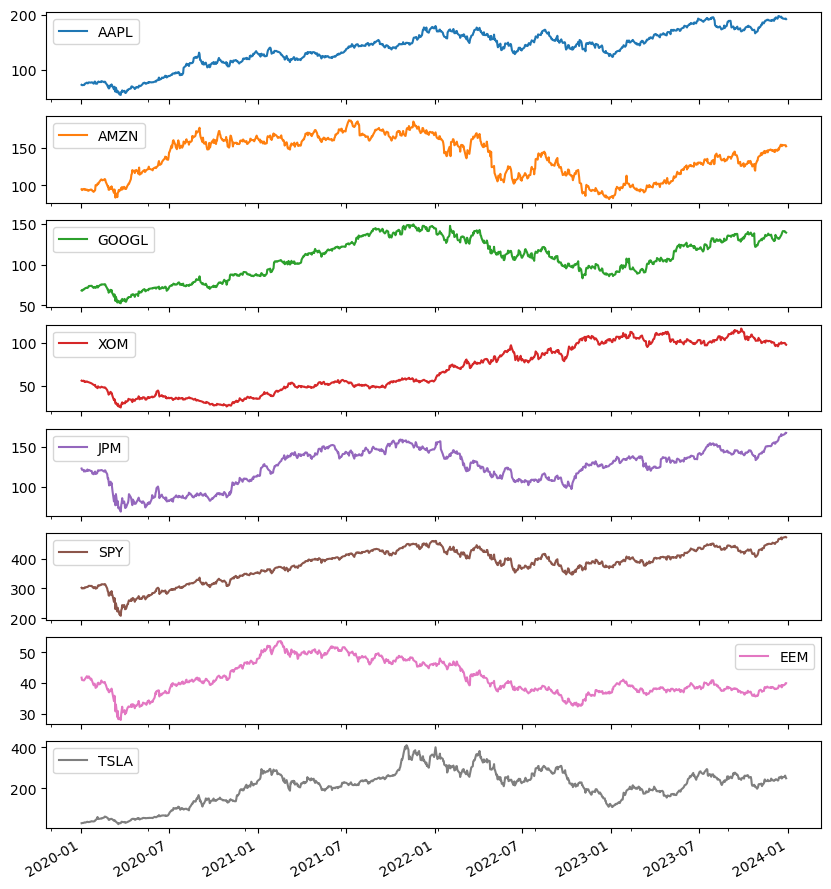

In [37]:
# Ver rápidamente la evolución de los activos
close_prices.plot(figsize=(10,12), subplots=True)

## Resampling No Paramétrico

In [44]:
# Calcular los retornos logarítmicos
log_returns = np.log(close_prices / close_prices.shift(1))

# Mostrar los primeros datos de los retornos
display(log_returns.head())

,AAPL,AMZN,GOOGL,XOM,JPM,SPY,EEM,TSLA
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.012213,-0.005245,-0.008072,-0.013284,-0.007601,-0.018742,0.029203
2020-01-06,0.007936,0.014776,0.026305,0.007649,-0.000795,0.003808,-0.002451,0.019072
2020-01-07,-0.004714,0.002089,-0.001933,-0.008218,-0.017147,-0.002816,-0.000670,0.038067
2020-01-08,0.015958,-0.007839,0.007092,-0.015195,0.007771,0.005315,0.005788,0.048033


In [52]:
# Parámetros del Bootstrap
n_bootstraps = 1000
n_observations = len(log_returns)
sample_size = n_observations // 2  # Usar la mitad de la muestra original

# Inicializar una lista para guardar los resultados
bootstrap_samples = []

for i in range(n_bootstraps):
    # Muestreo con reemplazo de los índices
    sample_indices = np.random.choice(a=n_observations, size=sample_size, replace=True)
    sample = log_returns.iloc[sample_indices]
    bootstrap_samples.append(sample)

# Opcional: mostrar una de las muestras para verificar
display(bootstrap_samples[0].head())

,AAPL,AMZN,GOOGL,XOM,JPM,SPY,EEM,TSLA
2023-05-16,0.000000,0.019591,0.025423,-0.024569,-0.006752,-0.006705,-0.007158,0.001021
2021-04-05,0.023304,0.020581,0.041020,-0.015630,0.005287,0.014251,0.003891,0.043324
2021-08-30,0.029964,0.021250,0.004065,-0.010998,-0.016137,0.004388,0.002130,0.026325
2022-07-28,0.003565,0.010771,0.010208,0.011617,-0.003738,0.012464,0.004243,0.021882
2023-04-05,-0.011355,-0.027800,-0.002390,0.016982,0.001490,-0.002622,-0.007871,-0.037349


In [58]:
# Listas para almacenar los retornos esperados y matrices de covarianza
expected_returns = []
covariance_matrices = []

for sample in bootstrap_samples:
    # Calcular el retorno esperado para cada activo en la muestra
    mean_returns = sample.mean() * 252
    expected_returns.append(mean_returns)
    
    # Calcular la matriz de covarianza para la muestra
    cov_matrix = sample.cov() * 252
    covariance_matrices.append(cov_matrix)

# Opcional: Mostrar los resultados de una de las muestras
print("Retornos Esperados de una muestra:")
display(expected_returns[0])
print("Matriz de Covarianza de una muestra:")
display(covariance_matrices[0])

Retornos Esperados de una muestra:


AAPL     0.081704
AMZN     0.138741
GOOGL   -0.101595
XOM     -0.245569
JPM      0.022854
SPY      0.061338
EEM      0.041238
TSLA     0.623193
dtype: float64

Matriz de Covarianza de una muestra:


,AAPL,AMZN,GOOGL,XOM,JPM,SPY,EEM,TSLA
AAPL,0.101544,0.073756,0.065800,0.025593,0.040360,0.052973,0.041523,0.093088
AMZN,0.073756,0.155992,0.077580,0.023461,0.034129,0.050878,0.039268,0.105751
GOOGL,0.065800,0.077580,0.094297,0.021923,0.038640,0.047717,0.035520,0.068215
XOM,0.025593,0.023461,0.021923,0.130421,0.055088,0.034345,0.028826,0.028315
JPM,0.040360,0.034129,0.038640,0.055088,0.093347,0.045092,0.035521,0.036847
SPY,0.052973,0.050878,0.047717,0.034345,0.045092,0.043155,0.033271,0.058102
EEM,0.041523,0.039268,0.035520,0.028826,0.035521,0.033271,0.046896,0.060088
TSLA,0.093088,0.105751,0.068215,0.028315,0.036847,0.058102,0.060088,0.436385


In [60]:
# Importar librería para optimizar
from scipy.optimize import minimize

In [62]:
# Función para calcular la varianza de la cartera
def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# Función para calcular el retorno total de la cartera
def portfolio_return(weights, returns):
    return weights.T @ returns

# Número de activos
n_assets = len(expected_returns[0])

In [64]:
# Lista para almacenar los resultados de la frontera eficiente
efficient_frontiers = []

# Correr el bucle de optimizaciones
for cov_matrix, returns in zip(covariance_matrices, expected_returns):
    frontier = []
    for target_return in np.linspace(returns.min(), returns.max(), num=50):
        # Definir las restricciones
        constraints = ({'type': 'eq', 'fun': lambda weights: portfolio_return(weights, returns) - target_return},
                       {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
        bounds = tuple((0, 1) for _ in range(n_assets))
        result = minimize(portfolio_variance, x0=np.repeat(1/n_assets, n_assets), args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
        frontier.append((target_return, np.sqrt(result.fun)))
    efficient_frontiers.append(frontier)

# Opcional: Mostrar los resultados de una de las fronteras eficientes
print("Una de las fronteras eficientes (retorno, riesgo):")
display(efficient_frontiers[0])

Una de las fronteras eficientes (retorno, riesgo):


[(-0.24556907204495954, 0.36113867296862073),
 (-0.22783923274791348, 0.3262542825740273),
 (-0.21010939345086743, 0.29656094209418726),
 (-0.19237955415382135, 0.27375309117417135),
 (-0.1746497148567753, 0.2594559016450354),
 (-0.15691987555972925, 0.2487670068960711),
 (-0.13919003626268317, 0.23900804323393784),
 (-0.12146019696563712, 0.23029045042618318),
 (-0.10373035766859107, 0.22274427305241504),
 (-0.08600051837154501, 0.21648747376379965),
 (-0.06827067907449896, 0.21147179316398731),
 (-0.050540839777452884, 0.2071359482729388),
 (-0.03281100048040683, 0.20346718649156548),
 (-0.01508116118336078, 0.20050403987779458),
 (0.002648678113685299, 0.19821806725620184),
 (0.020378517410731323, 0.196714903540607),
 (0.0381083567077774, 0.19638248289120658),
 (0.05583819600482348, 0.19796516308774245),
 (0.0735680353018695, 0.2021201910759836),
 (0.09129787459891558, 0.20781945156307563),
 (0.10902771389596161, 0.21494014107410533),
 (0.1267575531930077, 0.22334634761502456),
 (0.

In [68]:
# Calcula la frontera promedio
average_frontier = []
n_points = len(efficient_frontiers[0])  # Asumiendo que todas las fronteras tienen el mismo número de puntos

for i in range(n_points):
    avg_return = np.mean([frontier[i][0] for frontier in efficient_frontiers])
    avg_risk = np.mean([frontier[i][1] for frontier in efficient_frontiers])
    average_frontier.append((avg_return, avg_risk))

average_returns, average_risks = zip(*average_frontier)

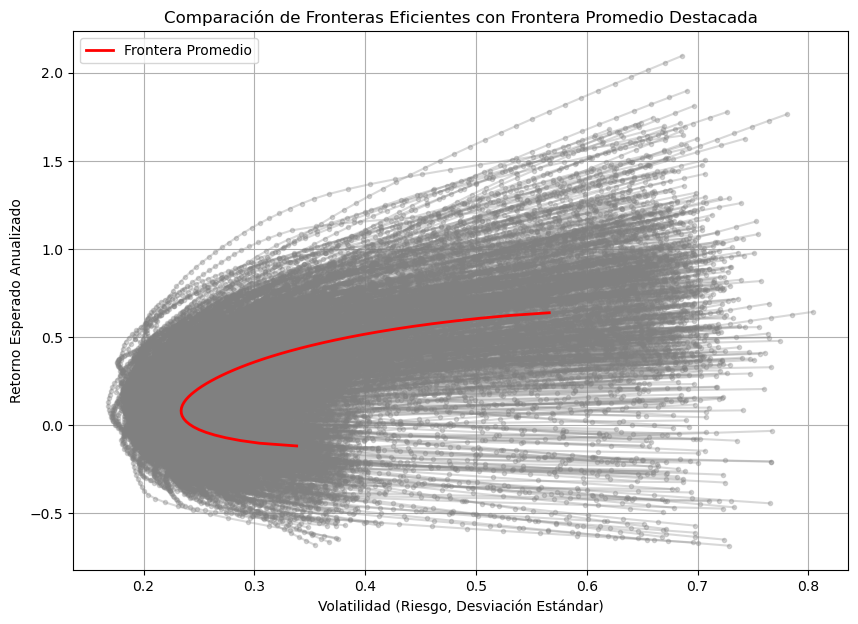

In [74]:
# Configurar la figura y el eje
plt.figure(figsize=(10, 7))
plt.title('Comparación de Fronteras Eficientes con Frontera Promedio Destacada')
plt.xlabel('Volatilidad (Riesgo, Desviación Estándar)')
plt.ylabel('Retorno Esperado Anualizado')
plt.grid(True)

# Graficar todas las fronteras en un color tenue o con puntos
for frontier in efficient_frontiers:
    returns, risks = zip(*frontier)
    plt.plot(risks, returns, color='grey', alpha=0.3, marker='o', markersize=3)

# Graficar la frontera promedio en un color destacado y línea más gruesa
plt.plot(average_risks, average_returns, color='red', linewidth=2, label='Frontera Promedio')
plt.legend()
plt.show()

## Resampling Paramétrico

In [78]:
# Calcular los estadísticos de las series logarítmicas
mean_returns = log_returns.mean()
std_dev_returns = log_returns.std()

In [84]:
n_simulations = 1000  # Número de simulaciones
n_observations = len(log_returns)  # Número de observaciones por simulación
sample_size = n_observations // 2  # Usar la mitad de la muestra original

simulated_samples = {}
for asset in log_returns.columns:
    # Generar muestras usando la media y desviación estándar del activo
    simulated_samples[asset] = np.random.normal(loc=mean_returns[asset], scale=std_dev_returns[asset], size=(n_simulations, sample_size))

In [86]:
# Crear un DataFrame para cada simulación y calcular estadísticas
simulated_returns = []
simulated_covariances = []

for i in range(n_simulations):
    sample_df = pd.DataFrame({asset: simulated_samples[asset][i] for asset in log_returns.columns})
    simulated_returns.append(sample_df.mean() * 252)  # Anualizar retornos
    simulated_covariances.append(sample_df.cov() * 252)  # Anualizar covarianza

# Usar 'simulated_returns' y 'simulated_covariances' para optimización de cartera

In [90]:
# Funciones para la optimización iterada
def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

def portfolio_return(weights, returns):
    return weights.T @ returns

def optimize_portfolio(cov_matrix, returns, target_return, initial_weights):
    constraints = (
        {'type': 'eq', 'fun': lambda weights: portfolio_return(weights, returns) - target_return},
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    )
    bounds = tuple((0, 1) for _ in range(len(returns)))
    result = minimize(portfolio_variance, x0=initial_weights, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    return (target_return, np.sqrt(result.fun), result.x)

In [94]:
# Realizar la optimización para cada simulación
efficient_frontiers = []
for returns, cov_matrix in zip(simulated_returns, simulated_covariances):
    frontier = []
    target_returns = np.linspace(returns.min(), returns.max(), num=50)
    initial_weights = np.repeat(1/len(returns), len(returns))
    for target_return in target_returns:
        result = optimize_portfolio(cov_matrix, returns, target_return, initial_weights)
        frontier.append((result[0], result[1]))
        initial_weights = result[2]  # Usar los pesos optimizados como inicial para el siguiente punto
    efficient_frontiers.append(frontier)

[[(-0.11664886041666428, 0.2467473064335538),
  (-0.09831071844411404, 0.16627112726885857),
  (-0.0799725764715638, 0.1470473616603021),
  (-0.061634434499013555, 0.13474001282675077),
  (-0.04329629252646332, 0.12532775390100012),
  (-0.02495815055391308, 0.11792191046218627),
  (-0.0066200085813628295, 0.11280643357303677),
  (0.011718133391187407, 0.10995040074663355),
  (0.030056275363737645, 0.10835927993466381),
  (0.04839441733628788, 0.10800266838229974),
  (0.06673255930883812, 0.10889342844959272),
  (0.08507070128138836, 0.1109978433589745),
  (0.10340884325393862, 0.11425988744875294),
  (0.12174698522648886, 0.1185755201570875),
  (0.1400851271990391, 0.12383263666280873),
  (0.15842326917158933, 0.12992672381954334),
  (0.17676141114413957, 0.13673850096308096),
  (0.1950995531166898, 0.14416455154982294),
  (0.21343769508924004, 0.15212324707980213),
  (0.23177583706179028, 0.1605290602112889),
  (0.2501139790343405, 0.16935630967197107),
  (0.26845212100689075, 0.17871

In [96]:
# Calcular la frontera eficiente promedio
def calculate_average_frontier(frontiers):
    average_frontier = []
    for i in range(len(frontiers[0])):
        avg_return = np.mean([f[i][0] for f in frontiers])
        avg_risk = np.mean([f[i][1] for f in frontiers])
        average_frontier.append((avg_return, avg_risk))
    return average_frontier

average_frontier = calculate_average_frontier(efficient_frontiers)
average_returns, average_risks = zip(*average_frontier)

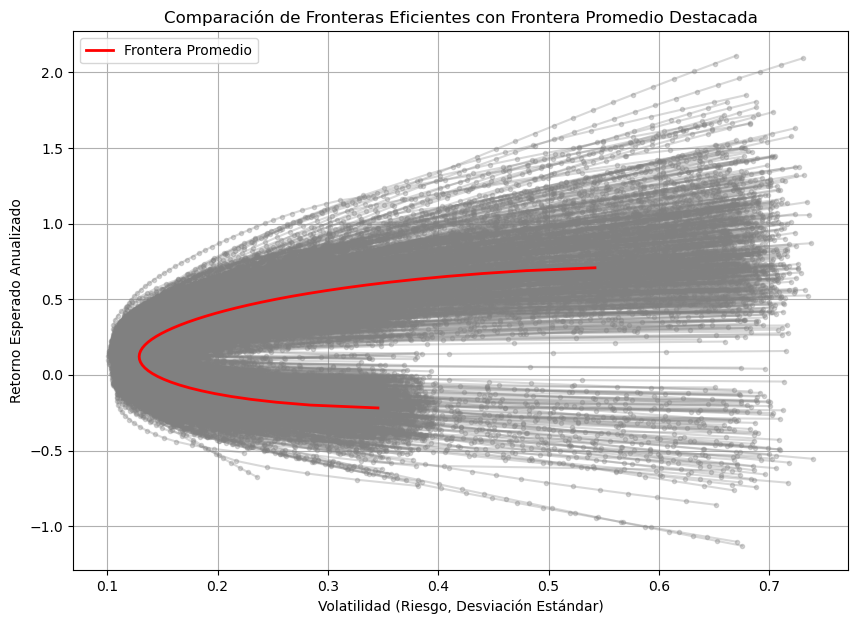

In [100]:
# Gráfico de fronteras eficientes y frontera eficiente promedio
plt.figure(figsize=(10, 7))
plt.title('Comparación de Fronteras Eficientes con Frontera Promedio Destacada')
plt.xlabel('Volatilidad (Riesgo, Desviación Estándar)')
plt.ylabel('Retorno Esperado Anualizado')
plt.grid(True)

# Graficar todas las fronteras en un color tenue
for frontier in efficient_frontiers:
    returns, risks = zip(*frontier)
    plt.plot(risks, returns, color='grey', alpha=0.3, marker='o', markersize=3)

# Graficar la frontera promedio en un color destacado
plt.plot(average_risks, average_returns, color='red', linewidth=2, label='Frontera Promedio')
plt.legend()
plt.show()